## Task

##### Utilize the Titanic dataset to construct a predictive model determining if apassenger survived the Titanic disaster.
##### • This project serves as an introductory exercise, offering accessible data for analysis.
##### • The dataset comprises passenger details encompassing age, gender, ticket class,fare, cabin, and survival outcome.
##### • By applying this data, you can embark on a classic project that provides insights into survival patterns among Titanic passengers.


## Load the Libraries

In [25]:
# used for performing Numerical operations
import numpy as np 
# used for data manipulation and analysis 
import pandas as pd            
# used for statistical data visualization
import seaborn as  sns           
# used for plotting and visualization
import matplotlib.pyplot as plt   
# used for applying machine learning algorithm.
from sklearn.model_selection import train_test_split                      
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load the dataset

In [56]:
# load the sample dataset into a dataframe
df=pd.read_csv('titanic_dataset.csv')       
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Vislualization

In [27]:
# Displaying the column names of the sample dataset
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
# Displaying the Brief summary of the sample dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
# display descriptive statistics for the numerical values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
# display only 1st 5 rows of the dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


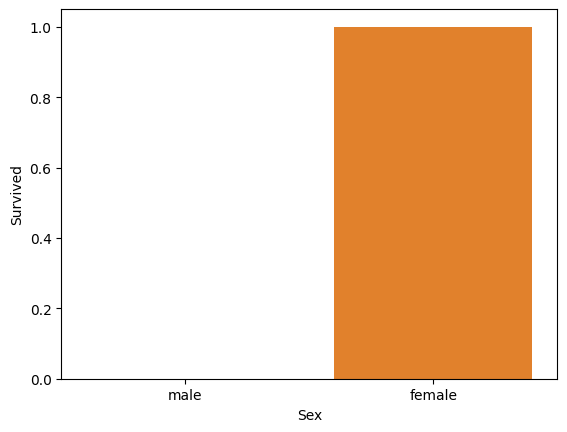

In [31]:
# create a barplot  
sns.barplot(data=df,y="Survived",x="Sex")
plt.show()

Survived
0    266
1    152
Name: count, dtype: int64


<Axes: title={'center': 'Survived'}, ylabel='count'>

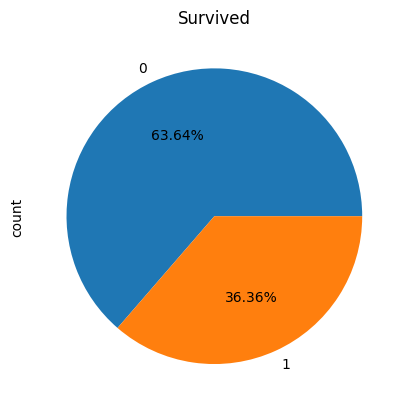

In [32]:
# count unique values in a Survived column 
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot(kind='pie',autopct='%0.2f%%',title='Survived')

Pclass
3    218
1    107
2     93
Name: count, dtype: int64


<Axes: title={'center': 'Pclass'}, ylabel='count'>

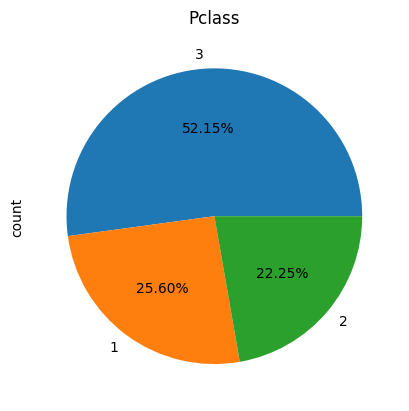

In [33]:
# count unique values in a Pclass column
print(df['Pclass'].value_counts())
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.2f%%',title='Pclass')

Sex
male      266
female    152
Name: count, dtype: int64


<Axes: title={'center': 'Sex'}, ylabel='count'>

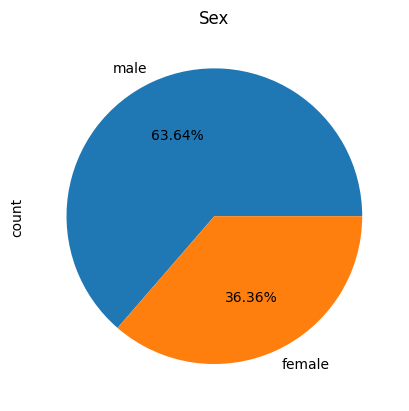

In [34]:
# count unique values in a Sex column
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='pie',autopct='%0.2f%%',title='Sex')

Embarked
Q     46
C    102
S    270
Name: count, dtype: int64


<Axes: title={'center': 'Embarked'}, ylabel='count'>

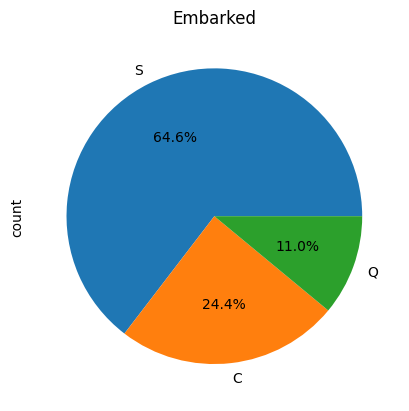

In [35]:
# count unique values in a Embarked column
print(df['Embarked'].value_counts(ascending=True))
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%',title='Embarked')

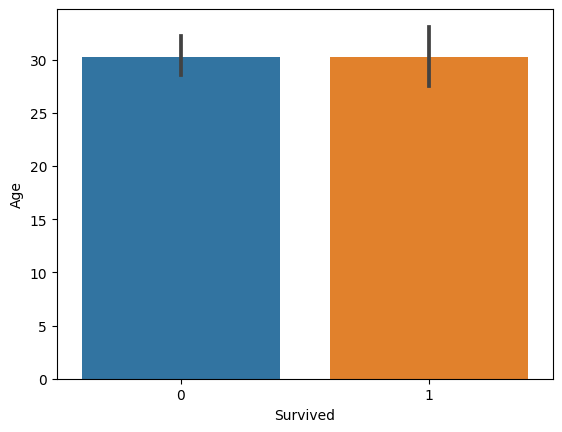

In [36]:
# create a barplot
# x=categorical variable(Survived)
# y=numerical variable(Age)
sns.barplot(data=df,x='Survived',y='Age')
plt.show()

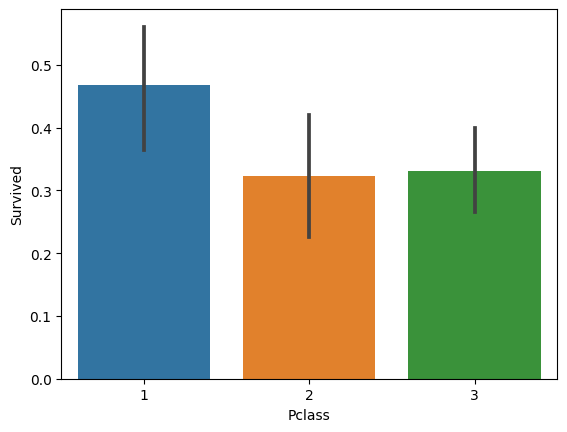

In [37]:
# create a barplot
# x=categorical variable(Pclass)
# y=categorical variable(Survived)
sns.barplot(data=df,x='Pclass',y='Survived')
plt.show()

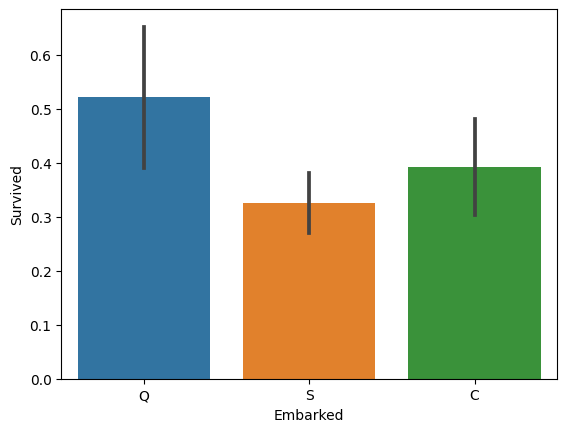

In [38]:
# create a barplot
# x=categorical variable(Embarked)
# y=categorical variable(Survived)
sns.barplot(data=df,y='Survived',x='Embarked')
plt.show()

## Data Preprocessing

In [39]:
# find the Missing values from the dataset
Missing_values=df.isnull().sum()
print(Missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


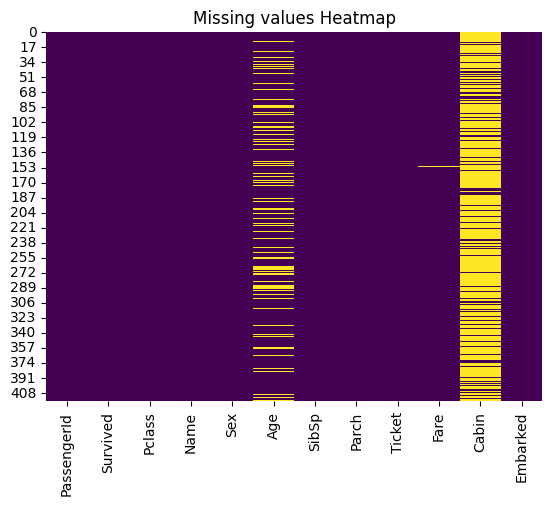

In [40]:
# create the Heatmap
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing values Heatmap")
plt.show()

In [41]:
df=df.copy()
# Handle the null values of age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Handle the null values of EEmbarked column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the unnecessary columns
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

df.dropna(inplace=True)

In [42]:
# Initialize the label encoder
label_encoder={}
# Apply label encoding to the "Sex" and "Embarked" column 
for column in ['Sex','Embarked']:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

In [43]:
# Create dummy values of sex and embarked column
df= pd.get_dummies(df,columns=['Sex', 'Embarked'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,3,34.50000,0,0,7.8292,False,True,False,True,False
1,1,3,47.00000,1,0,7.0000,True,False,False,False,True
2,0,2,62.00000,0,0,9.6875,False,True,False,True,False
3,0,3,27.00000,0,0,8.6625,False,True,False,False,True
4,1,3,22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,False,True,False,False,True
414,1,1,39.00000,0,0,108.9000,True,False,True,False,False
415,0,3,38.50000,0,0,7.2500,False,True,False,False,True
416,0,3,30.27259,0,0,8.0500,False,True,False,False,True


In [57]:
# Drop the Unnecessary columns
df = df.drop(["Sex","Embarked"], axis = 1)

In [45]:
# Calculate the correlation matrix
correlation_matrix=df.corr()

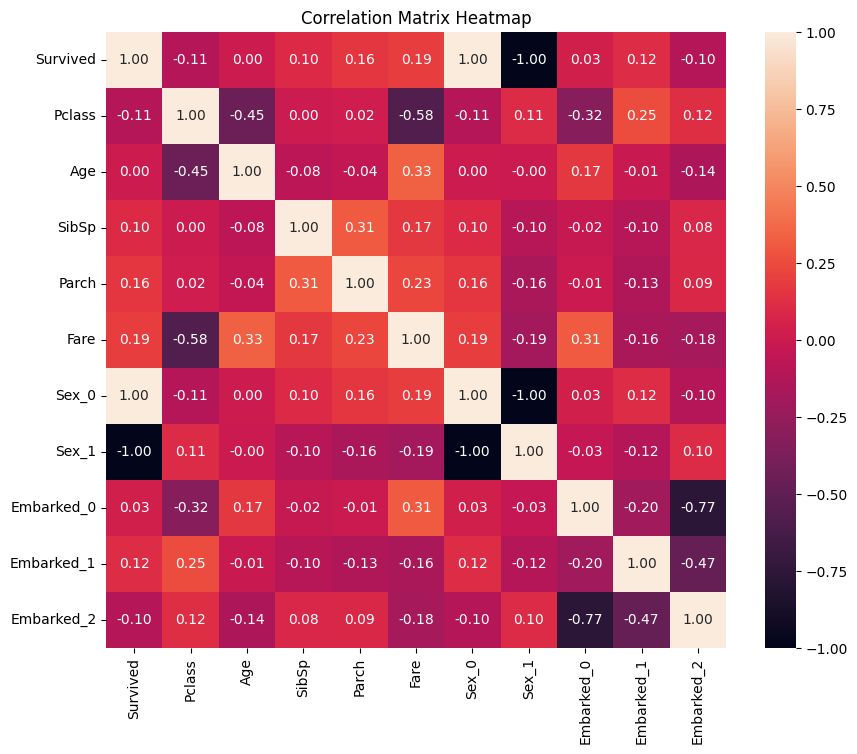

In [46]:
# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')              
plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the data into Training and Test set

In [47]:
# Define features (x) and target variable (y)
# y=target variable(output you want to predict)
# x=features used for training (input variables)
y = df['Survived']
x = df[["Pclass", "Sex_0", "Sex_1", "Age", "SibSp", "Parch", "Embarked_0","Embarked_1","Embarked_2"]]
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state=45) 

## Model Evaluation

Score of training_set: 1.0
Score of test_set: 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Classification_Matrix:


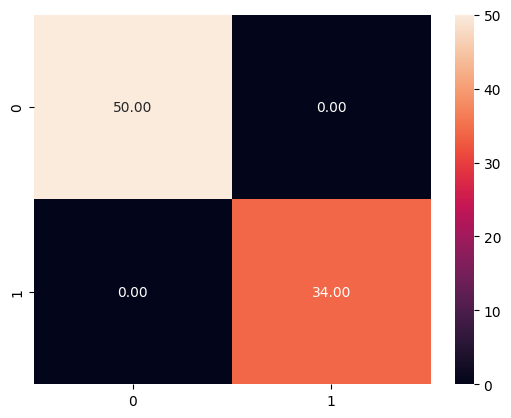

In [48]:
# Initialize the randomforestClassifier model
model_1 = RandomForestClassifier(n_estimators=70)
model_1.fit(x_train, y_train)   # train the model on training data

# Predict the target values for the test set
y_pred = model_1.predict(x_test)

print("Score of training_set:",model_1.score(x_train, y_train))
print("Score of test_set:",model_1.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True,fmt="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')



Score of training_set 1.0
Score of testing_set 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Classification_Matrix:


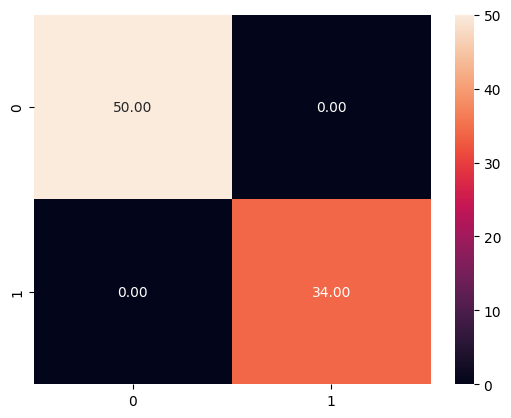

In [49]:
# Initialize the DecisiontreeClassifier model
model_2 = DecisionTreeClassifier()
model_2.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = model_2.predict(x_test)
print("Score of training_set",model_2.score(x_train, y_train))
print("Score of testing_set", model_2.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')

Score of training_set 1.0
Score of testing_set 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Classification_Matrix:


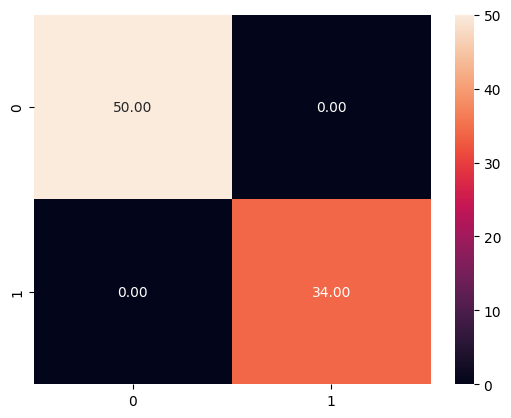

In [50]:
# Initialize the LogisticRegression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = log_reg.predict(x_test)
print("Score of training_set",log_reg.score(x_train, y_train))
print("Score of testing_set", log_reg.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')



Score of training_set 0.963963963963964
Score of testing_set 0.9047619047619048
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.96      0.79      0.87        34

    accuracy                           0.90        84
   macro avg       0.92      0.89      0.90        84
weighted avg       0.91      0.90      0.90        84

Classification_Matrix:


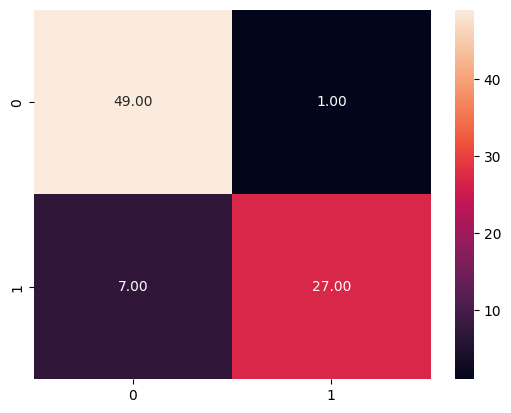

In [51]:
# Initialize the K-Nearest Neighbor model
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = kNN.predict(x_test)
print("Score of training_set",kNN.score(x_train, y_train))
print("Score of testing_set", kNN.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')

Score of training_set 1.0
Score of testing_set 1.0
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.96      0.79      0.87        34

    accuracy                           0.90        84
   macro avg       0.92      0.89      0.90        84
weighted avg       0.91      0.90      0.90        84

Classification_Matrix:


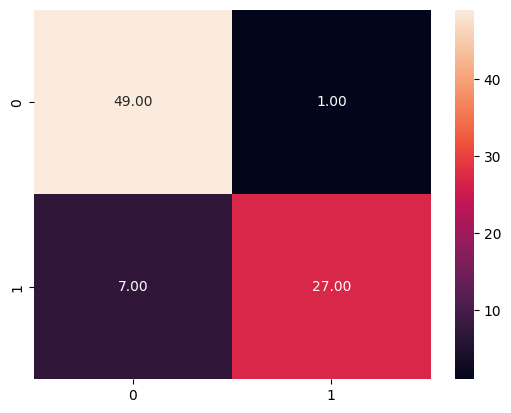

In [52]:
# Initialize the Gaussian naive bayes model
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train) 

# Predict the target values for the test set
Y_pred = gaussian.predict(x_test) 
print("Score of training_set",gaussian.score(x_train, y_train))
print("Score of testing_set", gaussian.score(x_test, y_test))


# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion report
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')

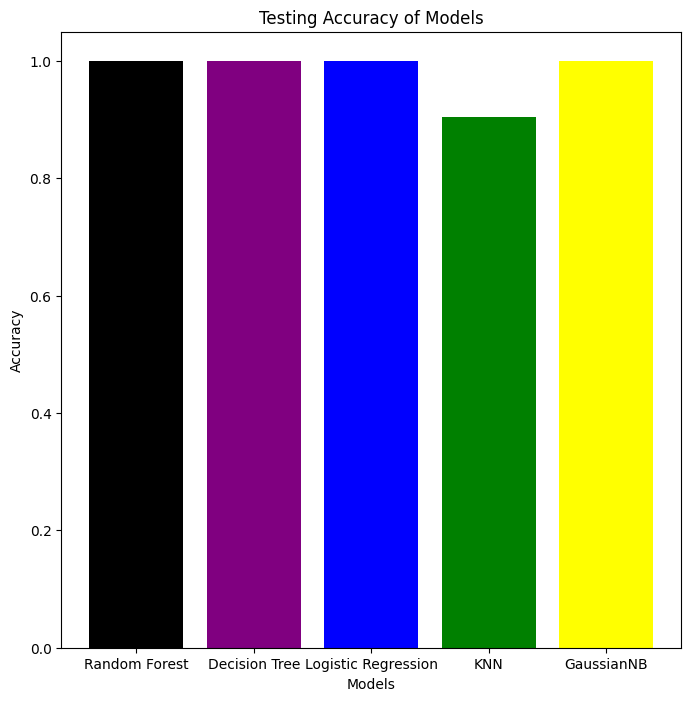

In [53]:
# Comparing all the Machine Learning Models and check the testing accuracies of all the models
model_names = ["Random Forest","Decision Tree","Logistic Regression", "KNN", "GaussianNB"]
test_accuracies = [model_1.score(x_test, y_test), model_2.score(x_test, y_test),
                    log_reg.score(x_test, y_test),kNN.score(x_test, y_test),gaussian.score(x_test, y_test)]    
plt.figure(figsize=(8,8))
colors = ["black", "purple", "blue", "green", "yellow"]
plt.bar(model_names, test_accuracies,color=colors)       
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.show()

In [54]:
# Predict the Output
num_predictions=len(y_pred)
df = pd.DataFrame({'PassengerId':range(num_predictions),
                   'Survived': y_pred})
df

,PassengerId,Survived
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
79,79,0
80,80,1
81,81,0
82,82,0


In [55]:
# Store output in .csv file
file_name = 'Survived_submission.csv'
df.to_csv(file_name, index=False)